# __Invasive Plant Data of Kentucky__

Source: https://www.invasiveplantatlas.org/list.html?id=24
*(Based on Data from 2013)*
***


### Goals

 - Read in data from two source types-
    1. The first df (df1, from a csv), lists invasive plant species by both common and scientific names as well as nativity.
    2. The second df (df2, also from a csv), has the same plants but lists an additional column of plant invasiveness. 
 - Combine the two dfs to create one main df (df_main).
 - Use seaborn to visually display plant stats.
 - Create a dictionary & function so a user can enter a plant name and see the details for that specific plant.


### Features

 - Read data from an external file, such as text, JSON, CSV, etc and use that data in your application.
 - Visualize data in a graph, chart, or other visual representation of data
 - Create and call at least 3 functions or methods, at least one of which must return a value that is used 
 somewhere else in your code. To clarify, at least one function should be called in your code, that function 
 should calculate, retrieve, or otherwise set the value of a variable or data structure, return a value to 
 where it was called, and use that value somewhere else in your code.


### Additional Features

 - Use pandas, matplotlib, and/or numpy to perform a data analysis project. Ingest 2 or more pieces of data, 
analyze that data in some manner, and display a new result to a graph, chart, or other display

In [10]:
# Imports 'pandas' into the script.
# From here on out it's referred to as 'pd'.
import pandas as pd

## 0.1 Reading In and Cleaning df1 
***

In [12]:
# Reads in data from a local csv file from our 'data' folder. 
# Then creates a dataframe(df) which is then assigned to 'df1'.
# The 'encoding='utf8'' is to ensure the entire df is more uniform later when manipulating the data.
df1 = pd.read_csv('data/Invasive_Plants_List - Sheet1.csv', encoding='utf8')

# Displays the first 5 rows of the df to see what I'm working with.
df1.head()

,Scientific_Name,Subject_Name,Family,US_Nativity
0,Acer platanoides L.,Norway maple,Aceraceae,Exotic
1,Achyranthes japonica (Miq.) Nakai,Japanese chaff flower,Amaranthaceae,Exotic
2,Agrostis stolonifera L.,creeping bentgrass,Poaceae,Exotic
3,Ailanthus altissima (P. Mill.) Swingle,tree-of-heaven,Simaroubaceae,Exotic
4,Akebia quinata (Houtt.) Dcne.,chocolate vine,Lardizabalaceae,Exotic


In [13]:
# This changes the col name from 'Subject Name' to 'Common Name'.
# The reason I did this is it's my understanding this will make it easier to merge the two dfs later.
df1.rename(columns={
    'Subject_Name':'Common_Name'},
          inplace=True)

# Displays the first 5 rows of the df after it's been cleaned to make sure the changes took place.
df1.head()

,Scientific_Name,Common_Name,Family,US_Nativity
0,Acer platanoides L.,Norway maple,Aceraceae,Exotic
1,Achyranthes japonica (Miq.) Nakai,Japanese chaff flower,Amaranthaceae,Exotic
2,Agrostis stolonifera L.,creeping bentgrass,Poaceae,Exotic
3,Ailanthus altissima (P. Mill.) Swingle,tree-of-heaven,Simaroubaceae,Exotic
4,Akebia quinata (Houtt.) Dcne.,chocolate vine,Lardizabalaceae,Exotic


## 0.2 Reading In and Cleaning df2
***

In [14]:
# Reads in df2 which is also saved in our 'data' folder and creates out df2.
# Again, encoding with 'utf8' to make sure the data is uniform for later use.
df2 = pd.read_csv('data/Invasive_Plants_Threat_Levels - Sheet1.csv', encoding='utf8')


# Again, displaying the first 5 rows of the df to get a look at the data.
df2.head()

,Scientific_Name,Common_Name,Threat_Level
0,Achyranthes japonica,Japanese chaff flower,1
1,Ailanthus altissima,tree-of-heaven,1
2,Alliaria petiolata,garlic mustard,1
3,Ampelopsis brevipedunculata,porcelain berry,1
4,Arthraxon hispidus,hairy jointgrass,1


In [15]:
# This will alphabetize the df based on the 'Scientific Names' col. 
# Again, this was done to possibly help with merging the two dfs later.
df2.sort_values(by=['Scientific_Name'])

# Checking our changes with the first few rows.
df2.head()

,Scientific_Name,Common_Name,Threat_Level
0,Achyranthes japonica,Japanese chaff flower,1
1,Ailanthus altissima,tree-of-heaven,1
2,Alliaria petiolata,garlic mustard,1
3,Ampelopsis brevipedunculata,porcelain berry,1
4,Arthraxon hispidus,hairy jointgrass,1


## 0.3 Combining df1 & df2 to Create combo_df 
***

In [34]:
##NOTE- If ever needed for later use.##
# df1 nunique = 176
# df2 nunique = 163

# Here df1 is being combined with df2 and filling in all the missing values with NaN.
combo_df = df1.combine_first(df2)

combo_df

,Common_Name,Family,Scientific_Name,Threat_Level,US_Nativity
0,Norway maple,Aceraceae,Acer platanoides L.,1.0,Exotic
1,Japanese chaff flower,Amaranthaceae,Achyranthes japonica (Miq.) Nakai,1.0,Exotic
2,creeping bentgrass,Poaceae,Agrostis stolonifera L.,1.0,Exotic
3,tree-of-heaven,Simaroubaceae,Ailanthus altissima (P. Mill.) Swingle,1.0,Exotic
4,chocolate vine,Lardizabalaceae,Akebia quinata (Houtt.) Dcne.,1.0,Exotic
5,mimosa,Fabaceae (Leguminosae),Albizia julibrissin Durazz.,1.0,Exotic
6,garlic mustard,Brassicaceae,Alliaria petiolata (Bieb.) Cavara & Grande,1.0,Exotic
7,cultivated garlic,Amaryllidaceae,Allium sativum L.,1.0,Exotic
8,wild garlic,Amaryllidaceae,Allium vineale L.,1.0,Exotic
9,European black alder,Betulaceae,Alnus glutinosa (L.) Gaertn.,1.0,Exotic


In [17]:
#----------------------------------------------------
# Cleaning the combo_df.
#----------------------------------------------------

# Combining the two 'Common_Name' cols that were previously returned after combining the two dfs.
combo_df.groupby(combo_df.Common_Name, axis=1).sum()

# Display all the rows to see what's now been filled with NaN.
# These rows and any duplicated date will be removed later. 
pd.set_option('display.max_rows', 176)

# Drop all rows that include NaN that line up within 'Threat_Level' col.
combo_df.dropna(subset=['Threat_Level'], inplace=True)

# Change the floats in the 'Threat_Level' col to integers.
combo_df.Threat_Level = combo_df.Threat_Level.astype(int)
combo_df

,Common_Name,Family,Scientific_Name,Threat_Level,US_Nativity
0,Norway maple,Aceraceae,Acer platanoides L.,1,Exotic
1,Japanese chaff flower,Amaranthaceae,Achyranthes japonica (Miq.) Nakai,1,Exotic
2,creeping bentgrass,Poaceae,Agrostis stolonifera L.,1,Exotic
3,tree-of-heaven,Simaroubaceae,Ailanthus altissima (P. Mill.) Swingle,1,Exotic
4,chocolate vine,Lardizabalaceae,Akebia quinata (Houtt.) Dcne.,1,Exotic
5,mimosa,Fabaceae (Leguminosae),Albizia julibrissin Durazz.,1,Exotic
6,garlic mustard,Brassicaceae,Alliaria petiolata (Bieb.) Cavara & Grande,1,Exotic
7,cultivated garlic,Amaryllidaceae,Allium sativum L.,1,Exotic
8,wild garlic,Amaryllidaceae,Allium vineale L.,1,Exotic
9,European black alder,Betulaceae,Alnus glutinosa (L.) Gaertn.,1,Exotic


## 0.4 Create a New CSV Using the combo_df
***

In [33]:
#----------------------------------------------------
# Reads the combo_df Back into a New CSV
#----------------------------------------------------

# Exports the 'combo_df' and creates a new CSV.
# This will be found within our 'data' folder called 'Combined_Invasive_Species - Sheet1.csv'
# The 'index=False' makes it so the index isn't included as it isn't useful in CSV format.

combo_df.to_csv('data/Combined_Invasive_Species - Sheet1.csv', index=False)

## 0.5 Breaking the combo_df Down
***

In [18]:
# Here we're going to break the 'combo_df' down into the top 5 most invasive family groups.

# Lists how many species are in each family. 
family_df = combo_df['Family'].value_counts()
family_df

# Shows just the top 5 invasive family groups. 
family_df.nlargest(5).index

Index(['Poaceae', 'Fabaceae (Leguminosae)', 'Asteraceae', 'Rosaceae',
       'Lamiaceae'],
      dtype='object')

In [22]:
# Displays the data for just the top 5 invasive plants.
top_family_df = combo_df[combo_df['Family'].isin(family_df.nlargest(5).index)].copy()
top_family_df

,Common_Name,Family,Scientific_Name,Threat_Level,US_Nativity
2,creeping bentgrass,Poaceae,Agrostis stolonifera L.,1,Exotic
5,mimosa,Fabaceae (Leguminosae),Albizia julibrissin Durazz.,1,Exotic
12,common burdock,Asteraceae,Arctium minus Bernh.,1,Exotic
14,mugwort,Asteraceae,Artemisia vulgaris L.,1,Exotic
15,"small carpetgrass, joint-head grass",Poaceae,Arthraxon hispidus (Thunb.) Makino,1,Exotic
16,giant reed,Poaceae,Arundo donax L.,1,Exotic
19,field brome,Poaceae,Bromus arvensis L.,1,Exotic
20,rescuegrass,Poaceae,Bromus catharticus Vahl,1,Exotic
21,soft brome,Poaceae,Bromus hordeaceus L.,1,Exotic
22,smooth brome,Poaceae,Bromus inermis Leyss.,1,Exotic


## 0.6 Creating Visualizations
***

In [23]:
# Imports 'matplotlib' into the script as 'plt'.
# The 'inline' just allows for accessing matplotlib from within the notebook.
from matplotlib import pyplot as plt
%matplotlib inline

# Imports 'seaborn' into the script as 'sns'.
import seaborn as sns

In [ ]:
#----------------------------------------------------
# TEST
#----------------------------------------------------

# From the seaborn docs, used to make sure seaborn works as it's supposed to within this notebook. 
# df = sns.load_dataset("penguins")
# sns.pairplot(df, hue="species")

In [24]:
# Creating a couple color palettes for the graphs.

family_grp_colors = [
    '#D4EFDF', # Poaceae 
    '#ABEBC6', # Fabaceae (Leguminosae) 
    '#7DCEA0', # Asteraceae
    '#52BE80', # Lamiaceae
    '#1E8449', #Rosaceae
]

threat_colors = [
    '#F4D03F', #1
    '#F39C12', #2
    '#DC7633', #3
    '#C0392B', #4
]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Poaceae'),
  Text(1, 0, 'Fabaceae (Leguminosae)'),
  Text(2, 0, 'Asteraceae'),
  Text(3, 0, 'Lamiaceae'),
  Text(4, 0, 'Rosaceae')])

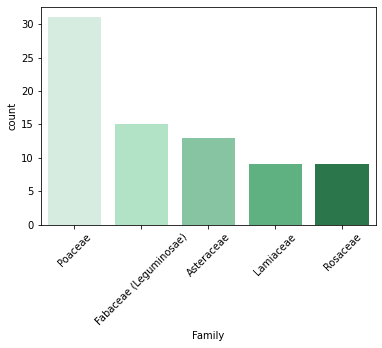

In [41]:
# Bar graph to display how many listed species are within each family group.
# Uses the 'top_family_df' and the 'family_grp_colors' array to create a bar graph.

sns.countplot(x='Family', data=top_family_df, palette=family_grp_colors)

# Rotates the x-axis labels to make them more readable.
plt.xticks(rotation=45)

# Notes- 
Here we can clearly see the 'Rosaceae' is the smallest family group in our invasive family species whereas the 'Poacae' group in the largest.
***

/home/haubrey47/Python_Files/Invasive_Plants/venv/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/haubrey47/Python_Files/Invasive_Plants/venv/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/haubrey47/Python_Files/Invasive_Plants/venv/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Threat_Level', ylabel='Family'>

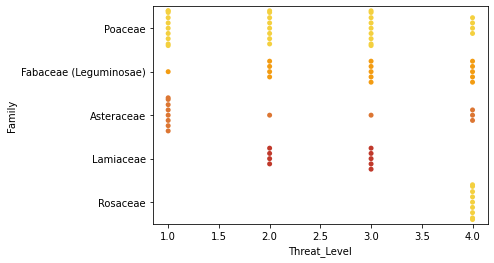

In [45]:
# Scatter/Swarm Plot

#
sns.swarmplot(x='Threat_Level', y='Family', data=top_family_df, 
             palette=threat_colors)
# plt.xticks(rotation=45)

Text(0.5, 1.0, 'Threat Levels by Family Groups')

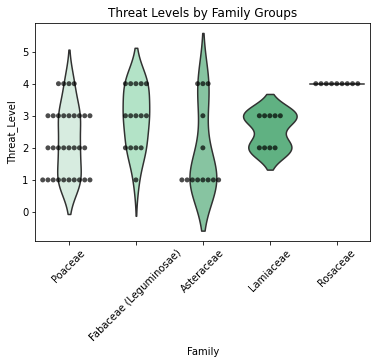

In [43]:
# Combo Graph- 
# Here we're combining a violin and scatter/swarm plot graph to show how many species are within each threat level.
# Uses the 'threat_colors' array to indicate ea. level.

# Create our violin & swarm plots.
# The 'inner' for the violin plot removes the default line that's in the center of ea. violin. 
sns.violinplot(x='Family', 
               y='Threat_Level', 
               data=top_family_df, 
              inner=None, 
              palette=family_grp_colors)

# Here 'color' specifies the color of the dots and 'alpha' makes them slightly transparent.
sns.swarmplot(x='Family', 
             y='Threat_Level', 
             data=top_family_df, 
             color='k', 
             alpha=0.7)

plt.xticks(rotation=45)

# Uses matplotlib to make a title.
plt.title('Threat Levels by Family Groups')


In [ ]:
# NOTE- Lol, help.
# These visualizations are mostly working off the family df as to skim down the amount of data.

# # Calculate correlation for heatmap.
# family_corr = top_family.corr()

# # Creates a heatmap plot.
# sns.heatmap(family_corr)

#### Possible Future Features

In [ ]:
# Create a method so a user can view the visualization for all plants at one type of threat level.
# Gather more data to show growth rates over time. (Fingers crossed on that one.)
# Gather more data to find the top 5, 10 & 50 most invasive species.